In [1]:
"""
References:
Colors Values: https://www.designwizard.com/blog/design-trends/colour-combination
Seaborn: https://seaborn.pydata.org/tutorial/regression.html
"""

'\nReferences:\nColors Values: https://www.designwizard.com/blog/design-trends/colour-combination\nSeaborn: https://seaborn.pydata.org/tutorial/regression.html\n'

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

from IPython.core.display import display, HTML                                    
display(HTML("<style>.container { width:100% !important; }</style>"))                                  #change width of Jupyer Notebook to use the whole window res

   Hum Nano 33 Sense  Hum Air Monitor
0              33.80               32
1              42.80               36
2              43.20               51
3              46.70               41
4              34.31               33
5              42.50               38
6              40.61               41
7              44.64               57 

Equation:  y=1.21x+-8.60
Standard Error:  0.5823593717984537


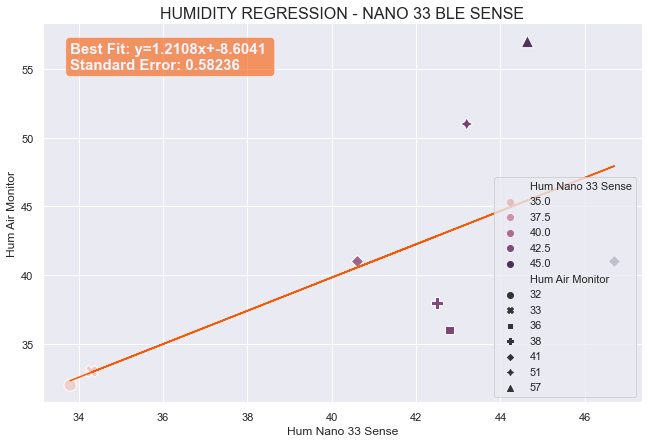

Would you like to save the plot? 
Press 1 to save! Press any key to exit.
1
Please type a name for the file: nano33sense_humidity_regression
The plot has been successfully saved!


In [3]:
def main():
    #data arrays
    data_title = "HUMIDITY REGRESSION - NANO 33 BLE SENSE"
    #X_array = np.array([30.44, 25.23, 18.21, 25.72, 29.68, 27.48, 24, 16.3])              #Humerature nicla
    #X_array = np.array([28.14,21.85,15.3,23.4,28.8,25.55,22.9,14.98])                     #Humerature nano 33 ble sense
    #Y_array = np.array([25, 22, 12.5, 22, 25, 23, 19, 12])                                #Humerature commercial sensor
    
    X_array = np.array([33.8,42.8,43.2,46.7,34.31,42.5,40.61,44.64])
    Y_array =np.array([32,36,51,41,33,38,41,57])
    
    #convert array to pandas dataframe
    df = pd.DataFrame({'Hum Nano 33 Sense': X_array, 'Hum Air Monitor': Y_array})
    print(df, "\n")

    #seaborn scatter plot
    sns.set_theme(color_codes=True)
    scatter = sns.relplot(kind="scatter", x="Hum Nano 33 Sense", y="Hum Air Monitor", hue="Hum Nano 33 Sense", 
                                 style="Hum Air Monitor", dashes=False,  data=df, height = 6, aspect = 1.5, s=150)
    scatter._legend.remove()                                                                                                                  #disable seaborn legend to have plot take care of it with location later
    plt.title(data_title, fontsize=16)                                                                                          #add plot title
    plt.subplots_adjust(top=0.95)                                                                                                             #add extra space at the top of the plot for the title

    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Hum Nano 33 Sense'], df['Hum Air Monitor'])
    line = slope*(df['Hum Nano 33 Sense'])+intercept
    plt.plot(df['Hum Nano 33 Sense'], line, '#F95700FF')
     #add custom annotation/legend for the best fit equation
    #legend
    plt.legend(loc='lower right')                                                                                                               #add data legend in the lower right corner
    plt.text(min(X_array), max(Y_array)-2, 'Best Fit: y={:.4f}x+{:.4f} \nStandard Error: {:.5f}'.format(slope,intercept,std_err), size=15,  
             horizontalalignment='left', color='#F1F4FFFF', weight='semibold', bbox=dict(boxstyle='round', facecolor='#F95700FF', alpha=0.6))
             

    print("Equation: ", 'y={:.2f}x+{:.2f}'.format(slope,intercept))
    print("Standard Error: ", std_err)
    plt.show()

    choice = int(input("Would you like to save the plot? \nPress 1 to save! Press any key to exit.\n"))
    if choice == 1: 
        name = input("Please type a name for the file: ") 
        scatter.savefig('./plots/' + name,dpi=600) 
        print("The plot has been successfully saved!")
    else: print("You have chosen not to save the plot!")

if __name__ == "__main__":                                                                                                                     #guard boilerplate
    main()